In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
os.chdir('D:/school/daoshi/流网络/实验')
os.getcwd()

'D:\\school\\daoshi\\流网络\\实验'

！！！先将数据两列提取出来，两个变量名为"from", "to"，保存

In [2]:
#读入文件，读入之前将source替换为0，将sink替换为50
data = pd.read_excel("data.xlsx")
#查看前3行 ，#查看后3行 data.tail(3)
data.head(3)

,from,to
0,-1,0
1,0,49
2,49,50


In [3]:
#为了使源和汇正常出现在矩阵横纵坐标中，集体数据中统一加1
data = data + 1
data.head(3)

,from,to
0,0,1
1,1,50
2,50,51


In [4]:
#查看行列数目,改变后边循环的range范围
data_len = len(data)
print(data_len)
data.shape

207


(207, 2)

In [5]:
#查看第几行第几列数据
print(data.iloc[0,1])

1


In [6]:
#建立值为0的空矩阵,0代表源，51代表汇
#pd.DataFrame(columns = ["ebayno", "p_sku", "sale", "sku"])
df = pd.DataFrame(data=0, columns=list(range(0,52)), index=list(range(0,52)))

In [7]:
#预览空矩阵
df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#向矩阵填写数据，改变range范围
for i in range(0,data_len):
    fromx = data.iloc[i,0]
    toy = data.iloc[i,1]
    #检查数据是否超过0到51的范围,如有异常，根据异常值进行修改，如果不修改也行，就是丢几个数据
    try:
        df.iloc[fromx,toy] = df.iloc[fromx,toy] + 1
    except Exception as e:
        print(fromx)
        print(toy)
        print(e)

50
140
single positional indexer is out-of-bounds
0
303
single positional indexer is out-of-bounds
49
81
single positional indexer is out-of-bounds
1
164
single positional indexer is out-of-bounds


# 矩阵输出

In [9]:
#再次查看矩阵
#积聚-就是0行的数据（1-50），代表每个点的积聚量
#流转-就是1-50列（1-50行）【50*50的子矩阵】每列对应的加和
#耗散-就是最后一列51列数据（1-50行）
df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,3,4,1,1,0,0,4,1,...,0,0,0,0,0,0,1,2,6,4
2,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 汇聚计算

In [10]:
#积聚-就是0行的数据（1-50），代表每个点的积聚量
df0 = df.ix[0:0]
df0

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df0 = df0.drop([0,51], axis=1)
df0

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df0 = df0.T
df0

,0
1,19
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0


In [13]:
df0['seq'] = range(1,51)
df0.rename(columns={0:'num','seq':'seq'},inplace=True)
df0.columns

Index(['num', 'seq'], dtype='object')

<font color='red'>由下图形状得知，需要将0点处的汇聚去掉，或者在这个实验中汇聚量本身没有意义</font>

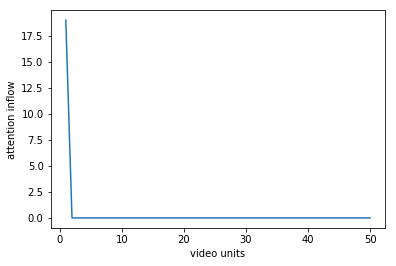

In [14]:
plt.plot(df0['seq'], df0['num'])
plt.xlabel('video units')
plt.ylabel('attention inflow')
plt.savefig('1')
plt.show()

# 流转计算

In [16]:
df00 = df.ix[1:50]
df00 = df00.drop([0,51], axis=1)
df00.loc['sum'] = df00.apply(lambda x: x.sum())
df00

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
1,0,3,4,1,1,0,0,4,1,1,...,0,0,0,0,0,0,0,1,2,6
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_00 = df00.ix['sum']
df_00 = pd.DataFrame({'seq':df_00.index,'num':df_00.values})
#df_00 = df_00.T
#df_00['seq'] = range(1,51)
#df_00.rename(columns={0:'num','seq':'seq'},inplace=True)

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [18]:
df_00

,seq,num
0,1,16
1,2,3
2,3,6
3,4,2
4,5,2
5,6,0
6,7,0
7,8,5
8,9,1
9,10,2


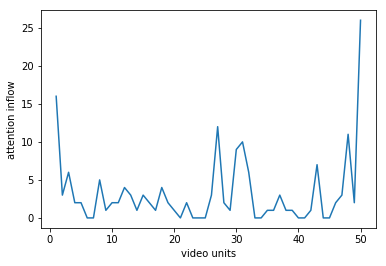

In [19]:
plt.plot(df_00['seq'], df_00['num'])
plt.xlabel('video units')
plt.ylabel('attention inflow')
plt.savefig('2')
plt.show()
#由下图形状得知，需要将0点处的去掉，或者这个汇聚量本身没有意义

# 耗散计算

In [20]:
#耗散-就是最后一列51列数据（1-50行）
df11 = df.ix[1:50,51]

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [21]:
df11

1      4
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     1
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     1
48     1
49     0
50    13
Name: 51, dtype: int64

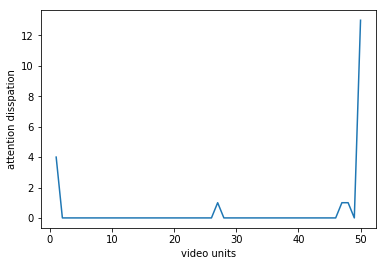

In [22]:
df11 = pd.DataFrame({'seq':df11.index,'num':df11.values})
plt.plot(df11['seq'], df11['num'])
plt.xlabel('video units')
plt.ylabel('attention disspation')
plt.savefig('3')
plt.show()
#由下图形状得知，需要将0点处的去掉，或者这个汇聚量本身没有意义